In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

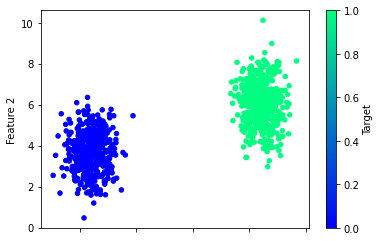

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [4]:
#normalize the data
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 642us/step - loss: 1.9737 - accuracy: 0.0000e+00
Epoch 2/100
24/24 [==============================] - 0s 497us/step - loss: 1.8976 - accuracy: 0.0000e+00
Epoch 3/100
24/24 [==============================] - 0s 486us/step - loss: 1.8251 - accuracy: 0.0000e+00
Epoch 4/100
24/24 [==============================] - 0s 486us/step - loss: 1.7568 - accuracy: 0.0000e+00
Epoch 5/100
24/24 [==============================] - 0s 481us/step - loss: 1.6911 - accuracy: 0.0000e+00
Epoch 6/100
24/24 [==============================] - 0s 493us/step - loss: 1.6275 - accuracy: 0.0000e+00
Epoch 7/100
24/24 [==============================] - 0s 492us/step - loss: 1.5687 - accuracy: 0.0013
Epoch 8/100
24/24 [==============================] - 0s 478us/step - loss: 1.5118 - accuracy: 0.0013
Epoch 9/100
24/24 [==============================] - 0s 484us/step - loss: 1.4584 - accuracy: 0.0027
Epoch 10/100
24/24 [==============================] - 0s 497us/step

24/24 [==============================] - 0s 483us/step - loss: 0.6933 - accuracy: 0.5053
Epoch 82/100
24/24 [==============================] - 0s 480us/step - loss: 0.6933 - accuracy: 0.5053
Epoch 83/100
24/24 [==============================] - 0s 478us/step - loss: 0.6933 - accuracy: 0.5053
Epoch 84/100
24/24 [==============================] - 0s 473us/step - loss: 0.6933 - accuracy: 0.5053
Epoch 85/100
24/24 [==============================] - 0s 465us/step - loss: 0.6933 - accuracy: 0.5053
Epoch 86/100
24/24 [==============================] - 0s 453us/step - loss: 0.6933 - accuracy: 0.5053
Epoch 87/100
24/24 [==============================] - 0s 493us/step - loss: 0.6933 - accuracy: 0.5053
Epoch 88/100
24/24 [==============================] - 0s 451us/step - loss: 0.6933 - accuracy: 0.5053
Epoch 89/100
24/24 [==============================] - 0s 467us/step - loss: 0.6932 - accuracy: 0.5053
Epoch 90/100
24/24 [==============================] - 0s 454us/step - loss: 0.6932 - accuracy: 

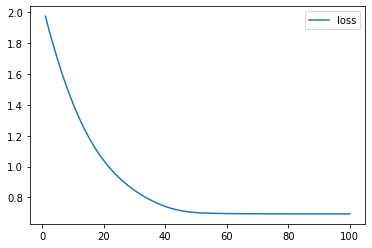

In [12]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

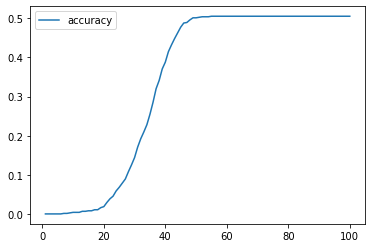

In [13]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.6944 - accuracy: 0.4720
Loss: 0.6944442987442017, Accuracy: 0.47200000286102295


In [15]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

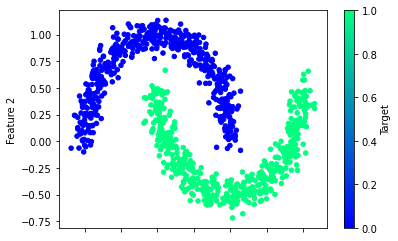

In [16]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")


In [17]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)


In [18]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 805us/step - loss: 0.6930 - accuracy: 0.5107
Epoch 2/100
24/24 [==============================] - 0s 725us/step - loss: 0.6928 - accuracy: 0.5147
Epoch 3/100
24/24 [==============================] - 0s 706us/step - loss: 0.6926 - accuracy: 0.5187
Epoch 4/100
24/24 [==============================] - 0s 694us/step - loss: 0.6924 - accuracy: 0.5267
Epoch 5/100
24/24 [==============================] - 0s 668us/step - loss: 0.6922 - accuracy: 0.5267
Epoch 6/100
24/24 [==============================] - 0s 705us/step - loss: 0.6921 - accuracy: 0.5280
Epoch 7/100
24/24 [==============================] - 0s 743us/step - loss: 0.6920 - accuracy: 0.5280
Epoch 8/100
24/24 [==============================] - 0s 736us/step - loss: 0.6919 - accuracy: 0.5293
Epoch 9/100
24/24 [==============================] - 0s 739us/step - loss: 0.6918 - accuracy: 0.5293
Epoch 10/100
24/24 [==============================] - 0s 701us/step - loss: 0.6917 - accura

24/24 [==============================] - 0s 726us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 82/100
24/24 [==============================] - 0s 672us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 83/100
24/24 [==============================] - 0s 693us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 84/100
24/24 [==============================] - 0s 683us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 85/100
24/24 [==============================] - 0s 670us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 86/100
24/24 [==============================] - 0s 667us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 87/100
24/24 [==============================] - 0s 696us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 88/100
24/24 [==============================] - 0s 683us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 89/100
24/24 [==============================] - 0s 722us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 90/100
24/24 [==============================] - 0s 696us/step - loss: 0.6913 - accuracy: 

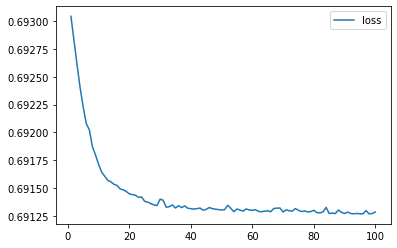

In [19]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

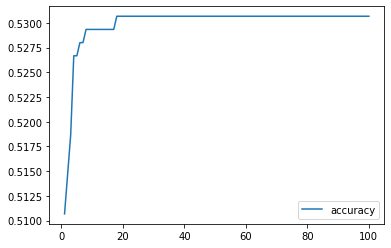

In [20]:
# Plot the loss
history_df.plot(y="accuracy")

In [21]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [22]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [23]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 591us/step - loss: 0.7608 - accuracy: 0.1600
Epoch 2/100
24/24 [==============================] - 0s 492us/step - loss: 0.7348 - accuracy: 0.2773
Epoch 3/100
24/24 [==============================] - 0s 505us/step - loss: 0.7116 - accuracy: 0.4347
Epoch 4/100
24/24 [==============================] - 0s 500us/step - loss: 0.6906 - accuracy: 0.4773
Epoch 5/100
24/24 [==============================] - 0s 497us/step - loss: 0.6704 - accuracy: 0.5027
Epoch 6/100
24/24 [==============================] - 0s 498us/step - loss: 0.6504 - accuracy: 0.5640
Epoch 7/100
24/24 [==============================] - 0s 502us/step - loss: 0.6298 - accuracy: 0.6773
Epoch 8/100
24/24 [==============================] - 0s 490us/step - loss: 0.6086 - accuracy: 0.7413
Epoch 9/100
24/24 [==============================] - 0s 481us/step - loss: 0.5862 - accuracy: 0.7627
Epoch 10/100
24/24 [==============================] - 0s 491us/step - loss: 0.5626 - accura

24/24 [==============================] - 0s 479us/step - loss: 0.1862 - accuracy: 0.9307
Epoch 82/100
24/24 [==============================] - 0s 473us/step - loss: 0.1847 - accuracy: 0.9307
Epoch 83/100
24/24 [==============================] - 0s 462us/step - loss: 0.1833 - accuracy: 0.9307
Epoch 84/100
24/24 [==============================] - 0s 489us/step - loss: 0.1818 - accuracy: 0.9307
Epoch 85/100
24/24 [==============================] - 0s 475us/step - loss: 0.1802 - accuracy: 0.9307
Epoch 86/100
24/24 [==============================] - 0s 470us/step - loss: 0.1788 - accuracy: 0.9307
Epoch 87/100
24/24 [==============================] - 0s 474us/step - loss: 0.1773 - accuracy: 0.9307
Epoch 88/100
24/24 [==============================] - 0s 471us/step - loss: 0.1758 - accuracy: 0.9307
Epoch 89/100
24/24 [==============================] - 0s 485us/step - loss: 0.1744 - accuracy: 0.9307
Epoch 90/100
24/24 [==============================] - 0s 488us/step - loss: 0.1728 - accuracy: 

In [24]:
# Import our dependencies
import pandas as pd
import sklearn as skl

# Read in our ramen data
ramen_df = pd.read_csv("Resources/ramen-ratings.csv")

# Print out the Country value counts
country_counts = ramen_df.Country.value_counts()
country_counts

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Nepal             14
Myanmar           14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Cambodia           5
Brazil             5
Holland            4
Fiji               4
Poland             4
Sarawak            3
Sweden             3
Dubai              3
Finland            3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: Country, dtype: int64

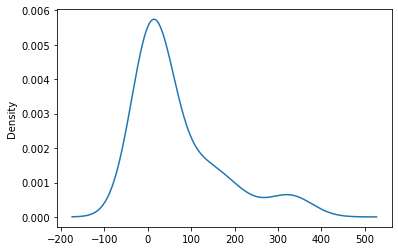

In [26]:
# Visualize the value counts
country_counts.plot.density()

In [27]:
# Determine which values to replace
replace_countries = list(country_counts[country_counts < 100].index)

# Replace in DataFrame
for country in replace_countries:
    ramen_df.Country = ramen_df.Country.replace(country,"Other")


# Check to make sure binning was successful
ramen_df.Country.value_counts()


Other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

In [31]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Country'])
encode_df.head()

,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# Merge the two DataFrames together and drop the Country column
ramen_df.merge(encode_df,left_index=True,right_index=True).drop("Country",1)

,Review #,Brand,Variety,Style,Stars,Top Ten,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:
# Import our dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read in our dataset
hr_df = pd.read_csv("Resources/hr_dataset.csv")
hr_df.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,0.30,1,253,2
1,0.25,1,200,0
2,0.90,4,2880,5
3,0.65,3,1450,3
4,0.50,2,785,2


In [34]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [35]:
# Fit the StandardScaler
scaler.fit(hr_df)


StandardScaler()

In [36]:
# Scale the data
scaled_data = scaler.transform(hr_df)

In [37]:
# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns=hr_df.columns)
transformed_scaled_data.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,-1.303615,-1.162476,-1.049481,-0.558656
1,-1.512945,-1.162476,-1.094603,-1.804887
2,1.208335,0.860233,1.187080,1.310692
3,0.161689,0.185996,-0.030385,0.064460
4,-0.466299,-0.488240,-0.596549,-0.558656


In [41]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
attrition_df = pd.read_csv('Resources/HR-Employee-Attrition.csv')
attrition_df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [43]:
# Generate our categorical variable list
attrition_cat = attrition_df.dtypes[attrition_df.dtypes == "object"].index.tolist()

In [44]:
# Check the number of unique values in each column
attrition_df[attrition_cat].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [45]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(attrition_df[attrition_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(attrition_cat)
encode_df.head()

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [46]:
# Merge one-hot encoded features and drop the originals
attrition_df = attrition_df.merge(encode_df,left_index=True, right_index=True)
attrition_df = attrition_df.drop(attrition_cat,1)
attrition_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [47]:
# Split our preprocessed data into our features and target arrays
y = attrition_df["Attrition_Yes"].values
X = attrition_df.drop(["Attrition_Yes","Attrition_No"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [48]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [49]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 448       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [51]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
35/35 [==============================] - 0s 601us/step - loss: 637.9043 - accuracy: 0.8276
Epoch 2/100
35/35 [==============================] - 0s 542us/step - loss: 430.9880 - accuracy: 0.8276
Epoch 3/100
35/35 [==============================] - 0s 532us/step - loss: 231.2262 - accuracy: 0.8276
Epoch 4/100
35/35 [==============================] - 0s 522us/step - loss: 95.0236 - accuracy: 0.8212
Epoch 5/100
35/35 [==============================] - 0s 537us/step - loss: 42.6629 - accuracy: 0.8276
Epoch 6/100
35/35 [==============================] - 0s 532us/step - loss: 16.6782 - accuracy: 0.8276
Epoch 7/100
35/35 [==============================] - 0s 534us/step - loss: 8.0606 - accuracy: 0.8276
Epoch 8/100
35/35 [==============================] - 0s 529us/step - loss: 4.4637 - accuracy: 0.8258
Epoch 9/100
35/35 [==============================] - 0s 527us/step - loss: 1.8126 - accuracy: 0.8149
Epoch 10/100
35/35 [==============================] - 0s 539us/step - loss: 0.6368

35/35 [==============================] - 0s 505us/step - loss: 0.4772 - accuracy: 0.8276
Epoch 82/100
35/35 [==============================] - 0s 541us/step - loss: 0.4838 - accuracy: 0.8276
Epoch 83/100
35/35 [==============================] - 0s 522us/step - loss: 0.4783 - accuracy: 0.8276
Epoch 84/100
35/35 [==============================] - 0s 513us/step - loss: 0.4763 - accuracy: 0.8276
Epoch 85/100
35/35 [==============================] - 0s 520us/step - loss: 0.4792 - accuracy: 0.8276
Epoch 86/100
35/35 [==============================] - 0s 521us/step - loss: 0.4689 - accuracy: 0.8276
Epoch 87/100
35/35 [==============================] - 0s 527us/step - loss: 0.4845 - accuracy: 0.8276
Epoch 88/100
35/35 [==============================] - 0s 582us/step - loss: 0.4756 - accuracy: 0.8276
Epoch 89/100
35/35 [==============================] - 0s 578us/step - loss: 0.4808 - accuracy: 0.8276
Epoch 90/100
35/35 [==============================] - 0s 543us/step - loss: 0.4814 - accuracy: 

In [52]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

12/12 - 0s - loss: 0.4015 - accuracy: 0.8723
Loss: 0.40150174498558044, Accuracy: 0.8722826242446899


In [53]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

# Import our input dataset
diabetes_df = pd.read_csv('Resources/diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
# Remove diabetes outcome target from features data
y = diabetes_df.Outcome
X = diabetes_df.drop(columns="Outcome")

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [55]:
# Preprocess numerical data for neural network

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [56]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")


 Logistic regression model accuracy: 0.729


In [57]:
# Define the basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=8))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
18/18 [==============================] - 0s 520us/step - loss: 0.6702 - accuracy: 0.6719
Epoch 2/100
18/18 [==============================] - 0s 479us/step - loss: 0.6442 - accuracy: 0.6736
Epoch 3/100
18/18 [==============================] - 0s 511us/step - loss: 0.6234 - accuracy: 0.6962
Epoch 4/100
18/18 [==============================] - 0s 500us/step - loss: 0.6047 - accuracy: 0.7101
Epoch 5/100
18/18 [==============================] - 0s 492us/step - loss: 0.5892 - accuracy: 0.7205
Epoch 6/100
18/18 [==============================] - 0s 541us/step - loss: 0.5752 - accuracy: 0.7257
Epoch 7/100
18/18 [==============================] - 0s 496us/step - loss: 0.5621 - accuracy: 0.7309
Epoch 8/100
18/18 [==============================] - 0s 516us/step - loss: 0.5513 - accuracy: 0.7292
Epoch 9/100
18/18 [==============================] - 0s 515us/step - loss: 0.5407 - accuracy: 0.7344
Epoch 10/100
18/18 [==============================] - 0s 471us/step - loss: 0.5317 - accura

18/18 [==============================] - 0s 476us/step - loss: 0.4327 - accuracy: 0.7899
Epoch 82/100
18/18 [==============================] - 0s 450us/step - loss: 0.4321 - accuracy: 0.7899
Epoch 83/100
18/18 [==============================] - 0s 458us/step - loss: 0.4319 - accuracy: 0.7951
Epoch 84/100
18/18 [==============================] - 0s 467us/step - loss: 0.4314 - accuracy: 0.7934
Epoch 85/100
18/18 [==============================] - 0s 461us/step - loss: 0.4311 - accuracy: 0.7899
Epoch 86/100
18/18 [==============================] - 0s 454us/step - loss: 0.4310 - accuracy: 0.7969
Epoch 87/100
18/18 [==============================] - 0s 459us/step - loss: 0.4307 - accuracy: 0.7951
Epoch 88/100
18/18 [==============================] - 0s 467us/step - loss: 0.4305 - accuracy: 0.7951
Epoch 89/100
18/18 [==============================] - 0s 450us/step - loss: 0.4302 - accuracy: 0.7951
Epoch 90/100
18/18 [==============================] - 0s 447us/step - loss: 0.4299 - accuracy: 

In [59]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd
import tensorflow as tf

# Import our input dataset
tele_df = pd.read_csv('Resources/bank_telemarketing.csv')
tele_df.head()

,Age,Job,Marital_Status,Education,Default_Credit,Housing_Loan,Personal_Loan,Subscribed
0,56,other,married,Primary_Education,no,no,no,no
1,37,services,married,Secondary_Education,no,yes,no,no
2,40,admin,married,Primary_Education,no,no,no,no
3,56,services,married,Secondary_Education,no,no,yes,no
4,59,admin,married,Professional_Education,no,no,no,no


In [60]:
# Generate our categorical variable list
tele_cat = tele_df.dtypes[tele_df.dtypes == "object"].index.tolist()


# Check the number of unique values in each column
tele_df[tele_cat].nunique()

Job               9
Marital_Status    3
Education         4
Default_Credit    2
Housing_Loan      2
Personal_Loan     2
Subscribed        2
dtype: int64

In [61]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(tele_df[tele_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(tele_cat)
encode_df.head()


,Job_admin,Job_blue-collar,Job_entrepreneur,Job_management,Job_other,Job_retired,Job_self-employed,Job_services,Job_technician,Marital_Status_divorced,...,Education_Secondary_Education,Education_Tertiary_Education,Default_Credit_no,Default_Credit_yes,Housing_Loan_no,Housing_Loan_yes,Personal_Loan_no,Personal_Loan_yes,Subscribed_no,Subscribed_yes
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [62]:
# Merge one-hot encoded features and drop the originals
tele_df = tele_df.merge(encode_df,left_index=True, right_index=True)
tele_df = tele_df.drop(tele_cat,1)
tele_df.head()

,Age,Job_admin,Job_blue-collar,Job_entrepreneur,Job_management,Job_other,Job_retired,Job_self-employed,Job_services,Job_technician,...,Education_Secondary_Education,Education_Tertiary_Education,Default_Credit_no,Default_Credit_yes,Housing_Loan_no,Housing_Loan_yes,Personal_Loan_no,Personal_Loan_yes,Subscribed_no,Subscribed_yes
0,56,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [63]:
# Remove loan status target from features data
y = tele_df.Subscribed_yes.values
X = tele_df.drop(columns=["Subscribed_no","Subscribed_yes"]).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [64]:
# Create the SVM model
svm = SVC(kernel='linear')

In [65]:
# Train the model
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [66]:
# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 SVM model accuracy: 0.873


# deep learning model

In [67]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  10
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [69]:
# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=50) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
715/715 [==============================] - 0s 596us/step - loss: 0.4028 - accuracy: 0.8720
Epoch 2/50
715/715 [==============================] - 0s 602us/step - loss: 0.3710 - accuracy: 0.8735
Epoch 3/50
715/715 [==============================] - 0s 581us/step - loss: 0.3687 - accuracy: 0.8735
Epoch 4/50
715/715 [==============================] - 0s 593us/step - loss: 0.3677 - accuracy: 0.8735
Epoch 5/50
715/715 [==============================] - 0s 594us/step - loss: 0.3667 - accuracy: 0.8735
Epoch 6/50
715/715 [==============================] - 0s 601us/step - loss: 0.3661 - accuracy: 0.8735
Epoch 7/50
715/715 [==============================] - 0s 577us/step - loss: 0.3654 - accuracy: 0.8735
Epoch 8/50
715/715 [==============================] - 0s 589us/step - loss: 0.3649 - accuracy: 0.8735
Epoch 9/50
715/715 [==============================] - 0s 588us/step - loss: 0.3642 - accuracy: 0.8735
Epoch 10/50
715/715 [==============================] - 0s 593us/step - loss: 0.364

# deep forest learning

In [70]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
loans_df = pd.read_csv('Resources/loan_status.csv')
loans_df.head()


,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,Fully_Paid,99999999,Short_Term,741.0,2231892.0,8_years,Own_Home,Debt_Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
1,Fully_Paid,217646,Short_Term,730.0,1184194.0,<_1_year,Home_Mortgage,Debt_Consolidation,10855.08,19.6,10.0,13,1,122170,272052.0,1.0,0.0
2,Fully_Paid,548746,Short_Term,678.0,2559110.0,2_years,Rent,Debt_Consolidation,18660.28,22.6,33.0,4,0,437171,555038.0,0.0,0.0
3,Fully_Paid,99999999,Short_Term,728.0,714628.0,3_years,Rent,Debt_Consolidation,11851.06,16.0,76.0,16,0,203965,289784.0,0.0,0.0
4,Fully_Paid,99999999,Short_Term,740.0,776188.0,<_1_year,Own_Home,Debt_Consolidation,11578.22,8.5,25.0,6,0,134083,220220.0,0.0,0.0


In [71]:
# Generate our categorical variable list
loans_cat = loans_df.dtypes[loans_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
loans_df[loans_cat].nunique()

Loan_Status              2
Term                     2
Years_in_current_job    11
Home_Ownership           4
Purpose                  7
dtype: int64

In [72]:
# Check the unique value counts to see if binning is required
loans_df.Years_in_current_job.value_counts()

10+_years    13149
2_years       3225
3_years       2997
<_1_year      2699
5_years       2487
4_years       2286
1_year        2247
6_years       2109
7_years       2082
8_years       1675
9_years       1467
Name: Years_in_current_job, dtype: int64

In [73]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(loans_df[loans_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(loans_cat)
encode_df.head()

,Loan_Status_Fully_Paid,Loan_Status_Not_Paid,Term_Long_Term,Term_Short_Term,Years_in_current_job_10+_years,Years_in_current_job_1_year,Years_in_current_job_2_years,Years_in_current_job_3_years,Years_in_current_job_4_years,Years_in_current_job_5_years,...,Home_Ownership_Home_Mortgage,Home_Ownership_Own_Home,Home_Ownership_Rent,Purpose_Business_Loan,Purpose_Buy_House,Purpose_Buy_a_Car,Purpose_Debt_Consolidation,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [74]:
# Merge one-hot encoded features and drop the originals
loans_df = loans_df.merge(encode_df,left_index=True, right_index=True)
loans_df = loans_df.drop(loans_cat,1)
loans_df.head()

,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,...,Home_Ownership_Home_Mortgage,Home_Ownership_Own_Home,Home_Ownership_Rent,Purpose_Business_Loan,Purpose_Buy_House,Purpose_Buy_a_Car,Purpose_Debt_Consolidation,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other
0,99999999,741.0,2231892.0,29200.53,14.9,29.0,18,1,297996,750090.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,217646,730.0,1184194.0,10855.08,19.6,10.0,13,1,122170,272052.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,548746,678.0,2559110.0,18660.28,22.6,33.0,4,0,437171,555038.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,99999999,728.0,714628.0,11851.06,16.0,76.0,16,0,203965,289784.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,99999999,740.0,776188.0,11578.22,8.5,25.0,6,0,134083,220220.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [75]:
# Remove loan status target from features data
y = loans_df.Loan_Status_Fully_Paid
X = loans_df.drop(columns=["Loan_Status_Fully_Paid","Loan_Status_Not_Paid"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [76]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.849


In [77]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
854/854 [==============================] - 1s 599us/step - loss: 0.4251 - accuracy: 0.8360
Epoch 2/50
854/854 [==============================] - 1s 605us/step - loss: 0.3868 - accuracy: 0.8490
Epoch 3/50
854/854 [==============================] - 1s 614us/step - loss: 0.3826 - accuracy: 0.8492
Epoch 4/50
854/854 [==============================] - 0s 578us/step - loss: 0.3804 - accuracy: 0.8493
Epoch 5/50
854/854 [==============================] - 1s 612us/step - loss: 0.3793 - accuracy: 0.8492
Epoch 6/50
854/854 [==============================] - 1s 609us/step - loss: 0.3785 - accuracy: 0.8494
Epoch 7/50
854/854 [==============================] - 1s 601us/step - loss: 0.3771 - accuracy: 0.8493
Epoch 8/50
854/854 [==============================] - 0s 562us/step - loss: 0.3765 - accuracy: 0.8497
Epoch 9/50
854/854 [==============================] - 1s 599us/step - loss: 0.3758 - accuracy: 0.8497
Epoch 10/50
854/854 [==============================] - 1s 610us/step - loss: 0.375

In [79]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [80]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
854/854 [==============================] - 1s 595us/step - loss: 0.3622 - accuracy: 0.8526
Epoch 2/100
 83/854 [=>............................] - ETA: 0s - loss: 0.3530 - accuracy: 0.8539
Epoch 00002: saving model to checkpoints/weights.02.hdf5
854/854 [==============================] - 1s 624us/step - loss: 0.3615 - accuracy: 0.8525
Epoch 3/100
251/854 [=======>......................] - ETA: 0s - loss: 0.3594 - accuracy: 0.8530
Epoch 00003: saving model to checkpoints/weights.03.hdf5
854/854 [==============================] - 1s 599us/step - loss: 0.3615 - accuracy: 0.8524
Epoch 4/100
432/854 [==============>...............] - ETA: 0s - loss: 0.3620 - accuracy: 0.8502
Epoch 00004: saving model to checkpoints/weights.04.hdf5
854/854 [==============================] - 1s 599us/step - loss: 0.3613 - accuracy: 0.8521
Epoch 5/100
516/854 [=================>............] - ETA: 0s - loss: 0.3582 - accuracy: 0.8540
Epoch 00005: saving model to checkpoints/weights.05.hdf5
854/854 

854/854 [==============================] - 0s 575us/step - loss: 0.3569 - accuracy: 0.8545
Epoch 38/100
357/854 [===========>..................] - ETA: 0s - loss: 0.3539 - accuracy: 0.8572
Epoch 00038: saving model to checkpoints/weights.38.hdf5
854/854 [==============================] - 1s 606us/step - loss: 0.3568 - accuracy: 0.8548
Epoch 39/100
505/854 [================>.............] - ETA: 0s - loss: 0.3551 - accuracy: 0.8556
Epoch 00039: saving model to checkpoints/weights.39.hdf5
854/854 [==============================] - 1s 612us/step - loss: 0.3568 - accuracy: 0.8543
Epoch 40/100
610/854 [====================>.........] - ETA: 0s - loss: 0.3565 - accuracy: 0.8540
Epoch 00040: saving model to checkpoints/weights.40.hdf5
854/854 [==============================] - 1s 590us/step - loss: 0.3559 - accuracy: 0.8549
Epoch 41/100
761/854 [=========================>....] - ETA: 0s - loss: 0.3549 - accuracy: 0.8557
Epoch 00041: saving model to checkpoints/weights.41.hdf5
854/854 [=======

854/854 [==============================] - 1s 599us/step - loss: 0.3541 - accuracy: 0.8547
Epoch 74/100
612/854 [====================>.........] - ETA: 0s - loss: 0.3495 - accuracy: 0.8569
Epoch 00074: saving model to checkpoints/weights.74.hdf5
854/854 [==============================] - 1s 586us/step - loss: 0.3540 - accuracy: 0.8548
Epoch 75/100
776/854 [==========================>...] - ETA: 0s - loss: 0.3540 - accuracy: 0.8553
Epoch 00075: saving model to checkpoints/weights.75.hdf5
854/854 [==============================] - 1s 595us/step - loss: 0.3539 - accuracy: 0.8553
Epoch 76/100
854/854 [==============================] - 1s 587us/step - loss: 0.3541 - accuracy: 0.8550
Epoch 77/100
 88/854 [==>...........................] - ETA: 0s - loss: 0.3584 - accuracy: 0.8498
Epoch 00077: saving model to checkpoints/weights.77.hdf5
854/854 [==============================] - 1s 600us/step - loss: 0.3537 - accuracy: 0.8545
Epoch 78/100
172/854 [=====>........................] - ETA: 0s - l

In [81]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

KeyError: 0

In [82]:
# Export our model to HDF5 file
nn_new.save("trained_attrition.h5")

NameError: name 'nn_new' is not defined